In [22]:
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
# for plot styling
sns.set() 

import matplotlib.pyplot as plt


In [23]:
data=pd.read_csv("movie_metadata.csv")
data.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


In [37]:
new_data=data[['director_facebook_likes','actor_3_facebook_likes']]
new_data.dropna(inplace=True)
new_data

C:\Users\vinod\AppData\Local\Temp\ipykernel_14136\2742531571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.dropna(inplace=True)


,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
5,475.0,530.0
...,...,...
5037,0.0,133.0
5038,2.0,318.0
5040,0.0,0.0
5041,0.0,489.0


# Using KMeans

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans=KMeans(n_clusters=5)

In [27]:
kmeans.fit(new_data)

C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [30]:
kmeans.cluster_centers_
#print(len(kmeans.cluster_centers_))

array([[  153.94452806,   424.19264674],
       [17621.21212121,   596.10606061],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [12490.38461538,   605.93269231]])

In [31]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
4919


In [36]:
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))


<class 'numpy.ndarray'>
{0: 4651, 1: 66, 2: 87, 3: 11, 4: 104}


C:\Users\vinod\AppData\Local\Temp\ipykernel_14136\2359403214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['cluster']=kmeans.labels_


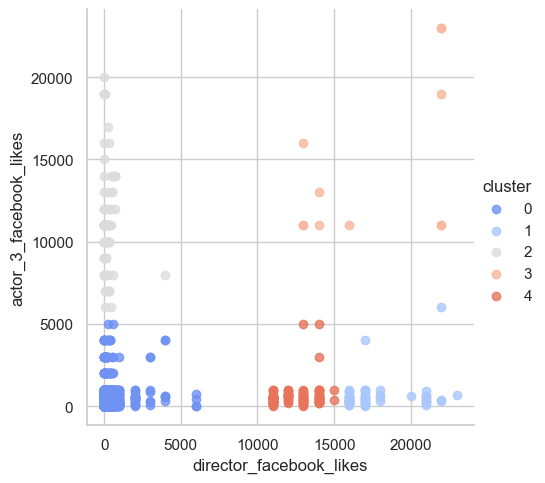

In [49]:
# plot the data
new_data['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='director_facebook_likes',y='actor_3_facebook_likes',data=new_data,hue='cluster',palette='coolwarm',fit_reg=False)

In [50]:
new_data

,director_facebook_likes,actor_3_facebook_likes,cluster
0,0.0,855.0,0
1,563.0,1000.0,0
2,0.0,161.0,0
3,22000.0,23000.0,3
5,475.0,530.0,0
...,...,...,...
5037,0.0,133.0,0
5038,2.0,318.0,0
5040,0.0,0.0,0
5041,0.0,489.0,0


In [64]:
url="https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv"
df=pd.read_csv(url).drop(['Name'],axis=1)
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [61]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

<Axes: xlabel='Age', ylabel='Income($)'>

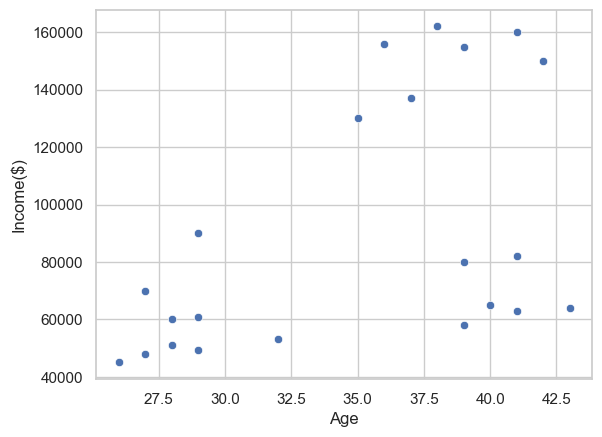

In [63]:
sns.scatterplot(x='Age',y="Income($)",data=df)

In [97]:
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [105]:
df['cluster_new']=y_predict
# df=df.drop(['cluster'],axis=1)
df.head()

,Age,Income($),cluster_new
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2


<Axes: xlabel='Age', ylabel='Income($)'>

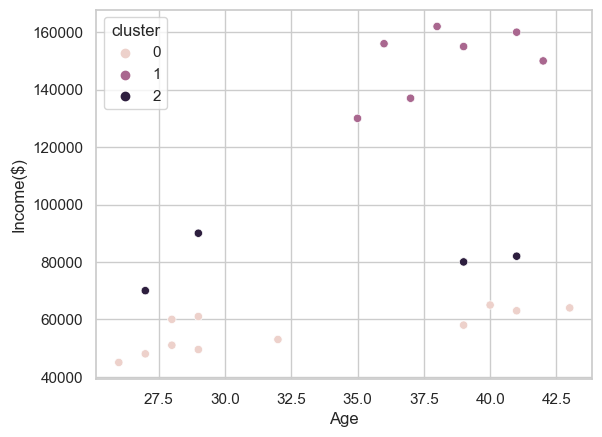

In [68]:
sns.scatterplot(x='Age',y='Income($)',data=df,hue='cluster')

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler=MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [106]:
df.head()

,Age,Income($),cluster_new
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2


# After MinMaxScaler() now we have the best clustering

<Axes: xlabel='Age', ylabel='Income($)'>

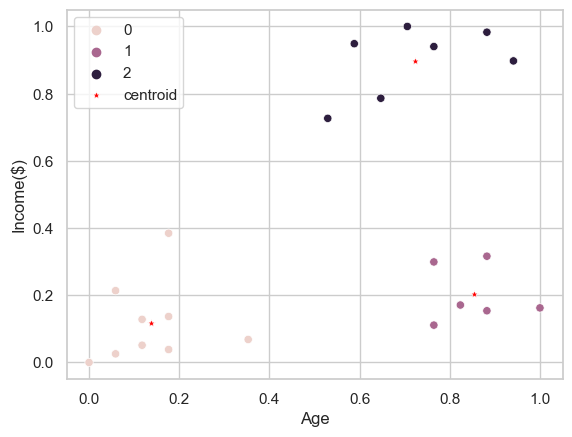

In [119]:

sns.scatterplot(x='Age',y='Income($)',data=df,hue='cluster_new')
sns.scatterplot(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],color="red",marker='*',label='centroid')

In [117]:
# Centroid (x,y)
km.cluster_centers_


array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [120]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    

C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [121]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530933,
 0.3491047094419564,
 0.27669362763002775,
 0.22443334487241415,
 0.16869711728567785,
 0.13265419827245162,
 0.1062989742140513]

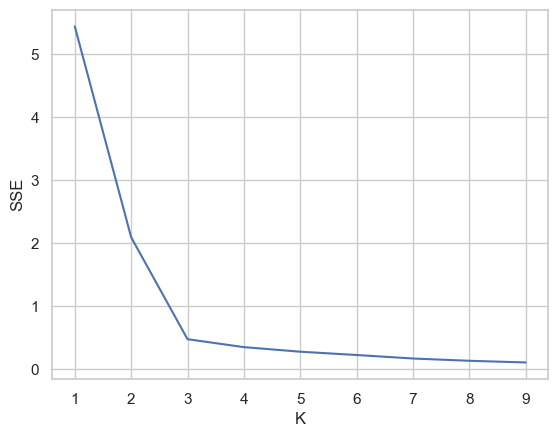

In [122]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)